## 9.3 Autoregressive models
In a multiple regression model, we forecast the variable of interest using a linear combination of **predictors**. In an autoregressive model, we forecast the variable of interest using a linear combination of *past values of the variable*. The term *auto*regression indicates that it is a regression of the variable against itself.

Thus, an autoregressive model of order $p$ can be written as
$$
y_t = c + \phi_1y_{t-1} +\phi_2y_{t-2} + \cdot + \phi_py_{t-p} + \epsilon_t,
$$
where $\epsilon_t$ is white noise. This is like a multiple regression but with **lagged values** of $y_t$ as predictors. We refer to this as an $\text{AR}(p)$ model, an autoregressive model of order $p$.

In [1]:
import sys
sys.path.append('..')
from utils import *

In [87]:
def AR(y_init, p, n_iter=1, phi=None, c=0):
    assert len(y_init) == p, "Initial values must equal to the autoregressive order p"
    results = y_init.copy()
    for i in range(n_iter-p+1):
        curr = np.array(results[-p:]).dot(phi[::-1]) + c + np.random.randn()
        results.append(curr)
    return results

In [102]:
ar1_y = AR(y_init=[11], p=1, n_iter=100, phi=[1], c=0)
ar2_y = AR(y_init=[20.5, 21], p=2, n_iter=100, phi=[1.3, -0.7], c=8)

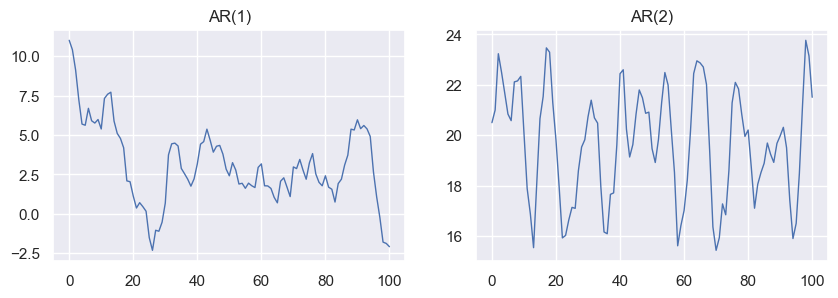

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(ar1_y)
axes[0].set(title='AR(1)')
axes[1].plot(ar2_y)
axes[1].set(title='AR(2)');

For an AR(1) model:
- when $\phi_1=0$ and $c=0$, $y_t$ is equivalent to white noise;
- when $\phi_1=1$ and $c=0$, $y_t$ is equivalent to a random walk;
- when $\phi_1=1$ and $c\ne 0$, $y_t$ is equivalent to a random walk with drift;
- when $\phi_1 < 0$, $y_t$ tends to oscillate around the mean.

We normally restrict autoregressive models to stationary data, in which case some constraints on the values of the parameters are required.
- For an AR(1) model: $-1 <\phi_1 1$.
- For an AR(2) model: $-1 <\phi_2<1, \phi_1+\phi_2 < 1, \phi_2-\phi_1<1$.

When $p\ge3$, the restrictions are much more complicated.